In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/productdemandforecasting/Historical Product Demand.csv


In [7]:
import seaborn as sns
from matplotlib import pyplot as plt 
from IPython.display import display, HTML
from io import StringIO
import random
import matplotlib.ticker as mtick 

In [9]:
df = pd.read_csv('/kaggle/input/productdemandforecasting/Historical Product Demand.csv')

# 1.2 Veri Setinin Hazırlanması

Proje isterlerinden olane “NaN” değerle yaratılmıştır.ir

In [11]:

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

# 1.3 Veri Temizleme ve Ön İşleme 

*İlk 5 satırı incelemek için:*

In [12]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


*Son 5 satırı incelemek için:*

In [13]:
df.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


*Satır ve sütun sayısı:*

In [14]:
df.shape

(1048575, 5)

In [16]:
print(f"Veri setinde toplam {len(df.columns)} kolon vardır ve bunlar sırasıyla: {', '.join(df.columns)}.")
# Kolonların veri tipi
print(f"Bu kolonların veri tipi: {type(df.columns)}\n")

Veri setinde toplam 5 kolon vardır ve bunlar sırasıyla: Product_Code, Warehouse, Product_Category, Date, Order_Demand.
Bu kolonların veri tipi: <class 'pandas.core.indexes.base.Index'>



In [22]:
df.info() #Kolonları yeniden inceliyorum
df.dtypes #Değişkenleri görmek için

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Product_Code  1048575 non-null  object
 1   Date          1037336 non-null  object
 2   Order_Demand  1048575 non-null  object
dtypes: object(3)
memory usage: 24.0+ MB


Product_Code    object
Date            object
Order_Demand    object
dtype: object

In [23]:
df.isna().sum() #Eksik verileri inceliyorum

Product_Code        0
Date            11239
Order_Demand        0
dtype: int64

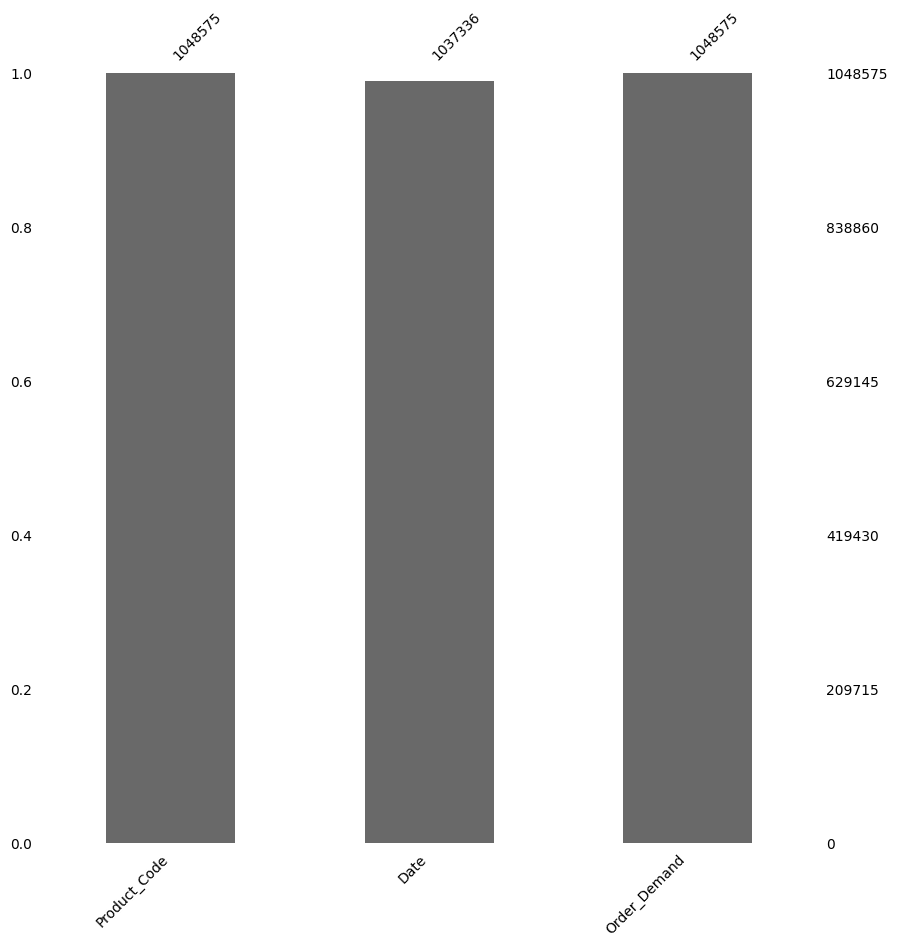

In [27]:
import missingno as missingno #Eksik veriler inceleniyor

missingno.bar(df = df,
         figsize = (10, 10),
         fontsize = 10);


*Eksik değerler için:*

In [29]:
ms_del = ['Date']
df = df.dropna(subset=ms_del)

# Veri Görselleştirme

In [ ]:
plt.figure(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [ ]:
df['Product_Code'].value_counts().plot.barh();

# Sonuç
Bu çalışmda, veri analizi sürecinde kullanılan yöntemlein kullanılması amaçlanmıştırr. Veri seti üzerinden yapılan analizler vegörselleştirilmeler verilmiştiru İleri analizlerde ürün talepleri üzerine Regresyon başta olmak üzere çeşitli makine öğrenmesi modelleri kullanılabilir..